# Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/food_affordability.csv')
df.shape

(14365, 23)

In [5]:
df.head(3)

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,median_income,affordability_ratio,LL95_affordability_ratio,UL95_affordability_ratio,se_food_afford,rse_food_afford,food_afford_decile,CA_RR_Affordability,ave_fam_size,version
0,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CA,6.0,California,NaN,NaN,...,23777.0,0.315779,0.231517,0.400043,0.042991,13.614342,NaN,1.185347,3.34,4/12/2013 4:33
1,757,Food affordability for female-headed household...,2006-2010,2.0,Asian,CA,6.0,California,NaN,NaN,...,38508.0,0.194980,0.183065,0.206895,0.006079,3.117814,NaN,0.731900,3.34,4/12/2013 4:33
2,757,Food affordability for female-headed household...,2006-2010,3.0,AfricanAm,CA,6.0,California,NaN,NaN,...,26192.0,0.286664,0.279661,0.293666,0.003573,1.246349,NaN,1.076054,3.34,4/12/2013 4:33


In [6]:
df.columns

Index(['ind_id', 'ind_definition', 'reportyear', 'race_eth_code',
       'race_eth_name', 'geotype', 'geotypevalue', 'geoname', 'county_name',
       'county_fips', 'region_name', 'region_code', 'cost_yr', 'median_income',
       'affordability_ratio', 'LL95_affordability_ratio',
       'UL95_affordability_ratio', 'se_food_afford', 'rse_food_afford',
       'food_afford_decile', 'CA_RR_Affordability', 'ave_fam_size', 'version'],
      dtype='object')

# Data Cleaning


The columns version, ind_definition, ind_id, and reportyear contain no analytical variation and are identical across all rows. Since all observations represent the same indicator (food affordability for female-headed households with children under 18, indicator code 757) reported over the 2006–2010 period, these fields do not provide additional information for analysis. To simplify the dataset and reduce unnecessary dimensionality, these columns are removed.

In [7]:
drop_cols = ["version", "ind_definition", "ind_id", "reportyear"]
df = df.drop(columns=drop_cols)

# Exploratory Data Analysis

We see that only race_eth_name = total has values in the food_afford_decile column. The variable food_afford_decile ranks all California places into 10 groups (deciles) based on their food affordability. Decile 1 = least affordable and Decile 10 = most affordable.

In [104]:
region_deciles = df[df["food_afford_decile"].notna()].groupby("region_name")["food_afford_decile"].mean().sort_values()

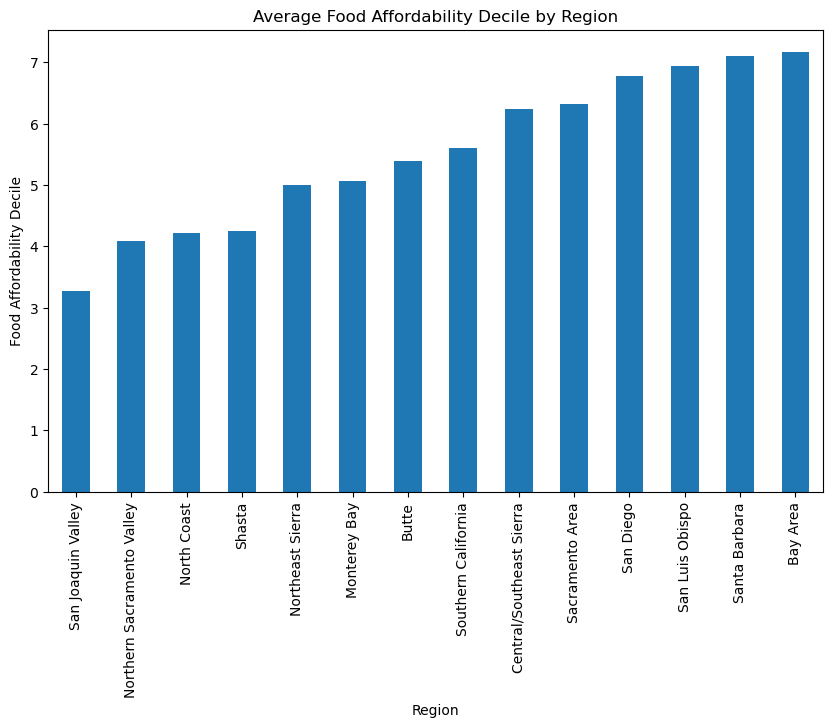

In [105]:
plt.figure(figsize=(10, 6))
region_deciles.plot.bar()

plt.xticks(rotation=90)
plt.title("Average Food Affordability Decile by Region")
plt.xlabel("Region")
plt.ylabel("Food Affordability Decile")
plt.show()

We can see that the region with the Least Affordable food Region is Bay Area and Most affordable region being San Joaquin Valley. 

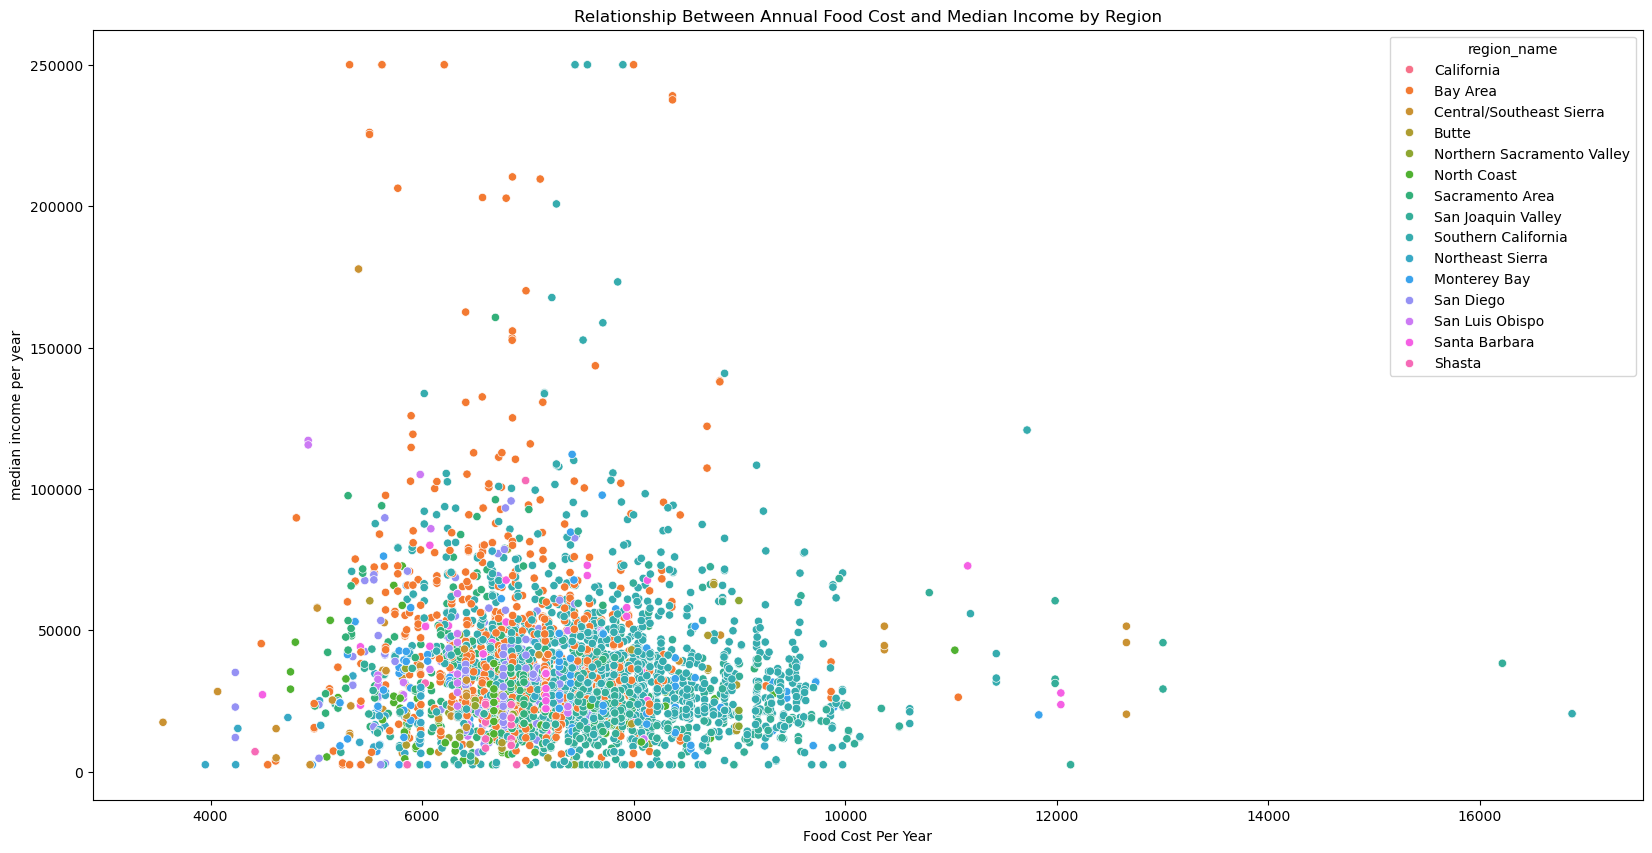

In [134]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, 
            x = "cost_yr",
            y = "median_income",
            hue = "region_name",
            )

plt.title("Relationship Between Annual Food Cost and Median Income by Region")
plt.xlabel("Food Cost Per Year")
plt.ylabel("Median Income Per Year")
plt.show()